## Pizza Sales
Import essential libraries:¶

In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Data To Jupyter Notebook

In [4]:
zip_path = r"C:\Users\GOODNESS\Downloads\Pizza+Place+Sales (1).zip"

extract_dir =r"C:\Users\GOODNESS\Downloads\pizza_sales_data"


In [5]:
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

In [6]:
import os

def load_csv(path):
    try:
        return pd.read_csv(path, encoding="utf-8")
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin-1")

In [7]:
orders = load_csv(os.path.join(extract_dir, "pizza_sales", "orders.csv"))
order_details = load_csv(os.path.join(extract_dir, "pizza_sales", "order_details.csv"))
pizzas = load_csv(os.path.join(extract_dir, "pizza_sales", "pizzas.csv"))

pizza_types = load_csv(os.path.join(extract_dir, "pizza_sales", "pizza_types.csv"))

## Arranging and Merging Data

In [9]:
orders["order_datetime"] = pd.to_datetime(orders["date"].astype(str) + ' ' + orders["time"].astype(str),errors = "coerce")

In [10]:
data = order_details.merge(orders[['order_id', 'order_datetime']], on = 'order_id', how ='left')
data = data.merge(pizzas, on = 'pizza_id', how = 'left')
data = data.merge(pizza_types, on = 'pizza_type_id', how = 'left')

In [11]:
data

,order_details_id,order_id,pizza_id,quantity,order_datetime,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [12]:
data.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
order_datetime      0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

## Creating four(4) new columns ; revenue, hour, day of week and month

In [14]:
data['revenue'] = data['quantity'] * data['price']
data['hour'] = data["order_datetime"].dt.hour
data['day_of_week'] =data["order_datetime"].dt.day_name()
data['month'] = data["order_datetime"].dt.month_name()

In [15]:
data

,order_details_id,order_id,pizza_id,quantity,order_datetime,pizza_type_id,size,price,name,category,ingredients,revenue,hour,day_of_week,month
0,1,1,hawaiian_m,1,2015-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,2,classic_dlx_m,1,2015-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,3,2,five_cheese_l,1,2015-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,4,2,ital_supr_l,1,2015-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,5,2,mexicana_m,1,2015-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,21,Thursday,December
48616,48617,21348,four_cheese_l,1,2015-12-31 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,21,Thursday,December
48617,48618,21348,napolitana_s,1,2015-12-31 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00,21,Thursday,December
48618,48619,21349,mexicana_l,1,2015-12-31 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,22,Thursday,December


## Creating new colunm that will tell the time of day using the hour to create it.


In [17]:
def get_time_of_day(hour):
    if hour <= 12:
        return 'Morning'
    elif hour <= 18:
        return 'Afternoon'
    elif hour <= 23:
        return 'Evening'
    else:
        return 'Night'

In [18]:
data['time_of_day'] =data['hour'].apply(get_time_of_day)

In [19]:
data

,order_details_id,order_id,pizza_id,quantity,order_datetime,pizza_type_id,size,price,name,category,ingredients,revenue,hour,day_of_week,month,time_of_day
0,1,1,hawaiian_m,1,2015-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January,Morning
1,2,2,classic_dlx_m,1,2015-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January,Morning
2,3,2,five_cheese_l,1,2015-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January,Morning
3,4,2,ital_supr_l,1,2015-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January,Morning
4,5,2,mexicana_m,1,2015-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,21,Thursday,December,Evening
48616,48617,21348,four_cheese_l,1,2015-12-31 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,21,Thursday,December,Evening
48617,48618,21348,napolitana_s,1,2015-12-31 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00,21,Thursday,December,Evening
48618,48619,21349,mexicana_l,1,2015-12-31 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,22,Thursday,December,Evening


## Analysis proper

In [21]:
# 1. What is the total revenue/sales?

total_revenue = data["revenue"].sum()

print("Total Revenue (Sales): $", round(total_revenue, 2))

Total Revenue (Sales): $ 817860.05


In [22]:
# 2. Find the total quantity sold.

total_quantity = data['quantity'].sum()

print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574


In [23]:
# 3. Find the total orders.

total_orders = orders["order_id"].nunique()

print("Total Orders:", total_orders)

Total Orders: 21350


In [24]:
# 4. How many pizza types do they sell?

num_pizza_types = pizza_types['pizza_type_id'].nunique()

print("Number of Pizza Types:", num_pizza_types)

Number of Pizza Types: 32


In [25]:
# 5. Find the average price of the pizzas.

avg_price = pizzas["price"].mean()

print("Average Pizza Price: $", round(avg_price, 2))

Average Pizza Price: $ 16.44


In [26]:
# 6.What are the peak hours of sales?

data['hour'] = data["order_datetime"].dt.hour

peak_hours = data.groupby("hour")["revenue"].sum().sort_values(ascending = False).head(5)

print(peak_hours)

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: revenue, dtype: float64


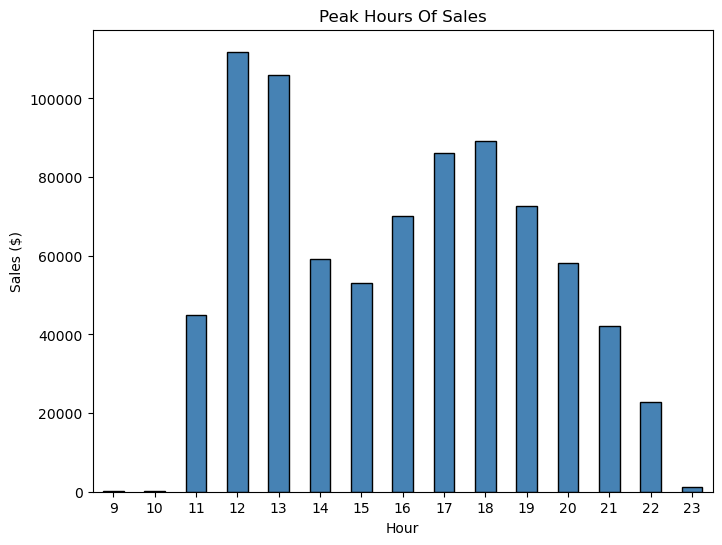

In [27]:
# Visualization
hourly_sales = data.groupby(data['order_datetime'].dt.hour)['revenue'].sum()

plt.figure(figsize=(8,6))

hourly_sales.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title("Peak Hours Of Sales")

plt.xlabel("Hour")

plt.ylabel("Sales ($)")

plt.xticks(rotation=0)

plt.show()

In [28]:
# 7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

data["day_of_week"] = data["order_datetime"].dt.day_name()

dow_sales = data.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False)

print(dow_sales)

print("Best day:", dow_sales.idxmax())

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64
Best day: Friday


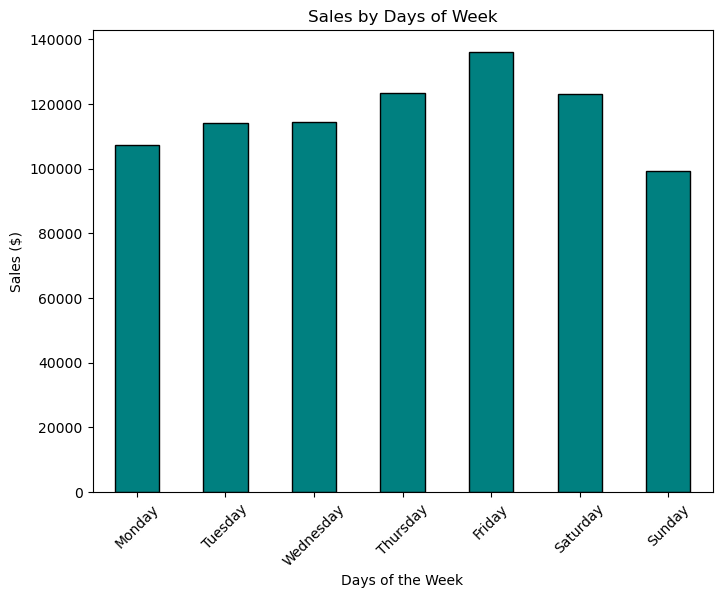

In [29]:
# Visualization

dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

dow_sales = data.groupby(data['order_datetime'].dt.day_name())['revenue'].sum().reindex(dow_order)

plt.figure(figsize=(8,6))

dow_sales.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Sales by Days of Week")

plt.xlabel("Days of the Week")

plt.ylabel("Sales ($)")

plt.xticks(rotation=45)

plt.show()

In [30]:
# 8.Find the top 5 bestselling pizzas.

data['pizza_label'] = data['name'] + " (" + data['size'] + ")"

top5_pizzas = data.groupby('pizza_label')['quantity'].sum().sort_values(ascending=False).head(5)

print(top5_pizzas)

pizza_label
The Big Meat Pizza (S)          1914
The Thai Chicken Pizza (L)      1410
The Five Cheese Pizza (L)       1409
The Four Cheese Pizza (L)       1316
The Classic Deluxe Pizza (M)    1181
Name: quantity, dtype: int64


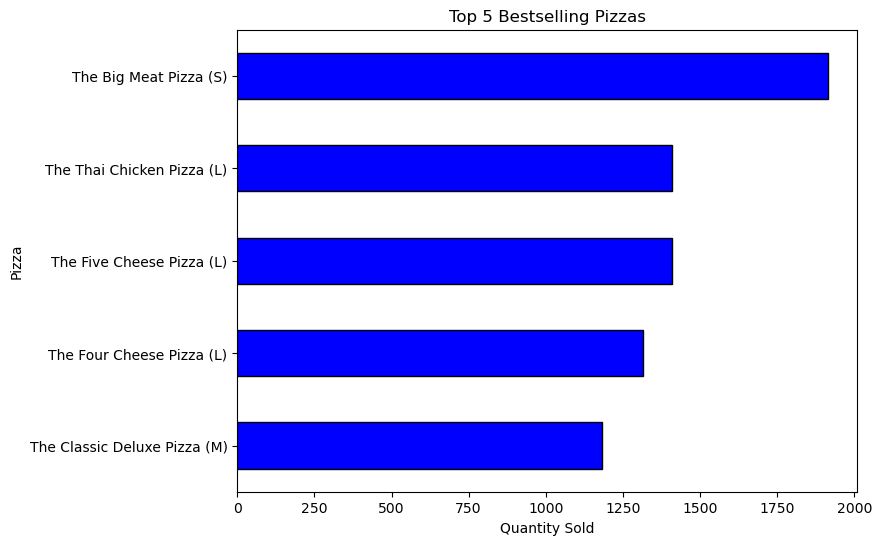

In [31]:
# Visualization

top5_pizzas = data.groupby('pizza_label')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))

top5_pizzas.plot(kind='barh', color='blue', edgecolor='black')

plt.title("Top 5 Bestselling Pizzas")

plt.xlabel("Quantity Sold")

plt.ylabel("Pizza")

plt.gca().invert_yaxis()

plt.show()

In [32]:
# 9.Find the sales made in each month. Any trend noticeable?

data['month'] = data['order_datetime'].dt.to_period('M')
monthly_sales = data.groupby('month')['revenue'].sum()
print(monthly_sales)

month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: revenue, dtype: float64


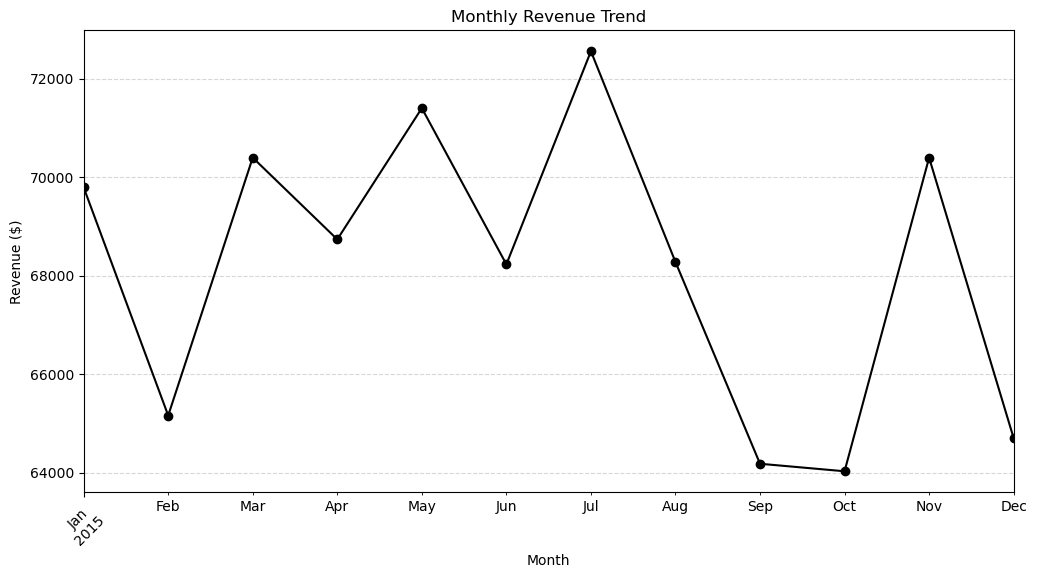

In [33]:
# Visualization

plt.figure(figsize=(12,6))

monthly_sales.plot(marker='o', color='black')

plt.title("Monthly Revenue Trend")

plt.xlabel("Month")

plt.ylabel("Revenue ($)")

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)

sns.lineplot

plt.show()

In [34]:
#10. Are there pizza types that are not doing well on the menu?

# By quantity

low_pizzatypes = data.groupby('name')['quantity'].sum().sort_values()

print(low_pizzatypes.head(5))

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


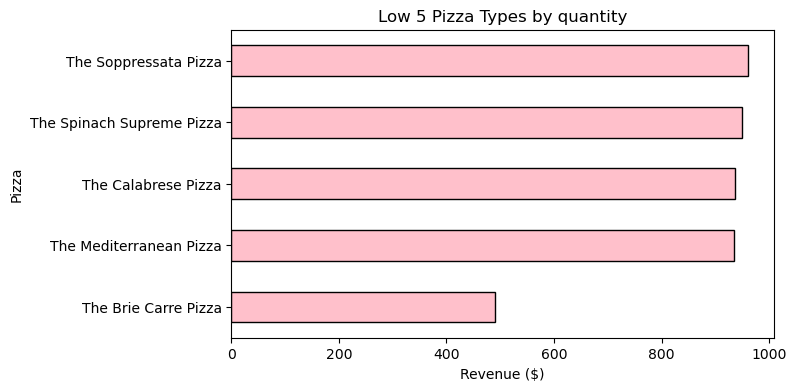

In [35]:
# Visualization

low5_pizzas = data.groupby('name')['quantity'].sum().sort_values().head(5)

plt.figure(figsize=(7,4))

low5_pizzas.plot(kind='barh', color='pink', edgecolor='black')

plt.title("Low 5 Pizza Types by quantity")

plt.xlabel("Revenue ($)")

plt.ylabel("Pizza")

plt.show()

In [36]:
# By Revenue

low_pizzatypes = data.groupby('name')['revenue'].sum().sort_values()

print(low_pizzatypes.head(5))

name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: revenue, dtype: float64


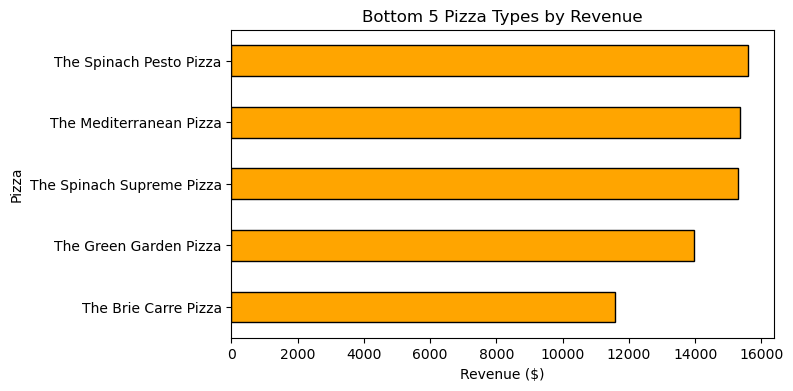

In [37]:
# Visualization

low5_pizzas = data.groupby('name')['revenue'].sum().sort_values().head(5)

plt.figure(figsize=(7,4))

low5_pizzas.plot(kind='barh', color='orange', edgecolor='black')

plt.title("Bottom 5 Pizza Types by Revenue")

plt.xlabel("Revenue ($)")

plt.ylabel("Pizza")

plt.show()

## Extra Analysis

In [39]:
# Which pizza size (S, M, L, XL, XXL) makes more sales?

size_sales = data.groupby('size')['revenue'].sum().sort_values(ascending=False)

print(size_sales)

size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


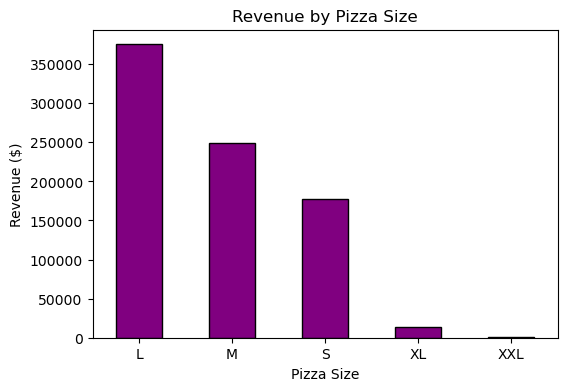

In [40]:
# Visualization

size_sales = data.groupby('size')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))

size_sales.plot(kind='bar', color='purple', edgecolor='black')

plt.title("Revenue by Pizza Size")

plt.xlabel("Pizza Size")

plt.ylabel("Revenue ($)")

plt.xticks(rotation=0)

plt.show()

In [41]:
#  Which pizza category (e.g., Classic, Supreme, Veggie, etc.) makes more sales?

pizza_category = data.groupby('category')['revenue'].sum().sort_values(ascending=False)

print(pizza_category)



category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: revenue, dtype: float64


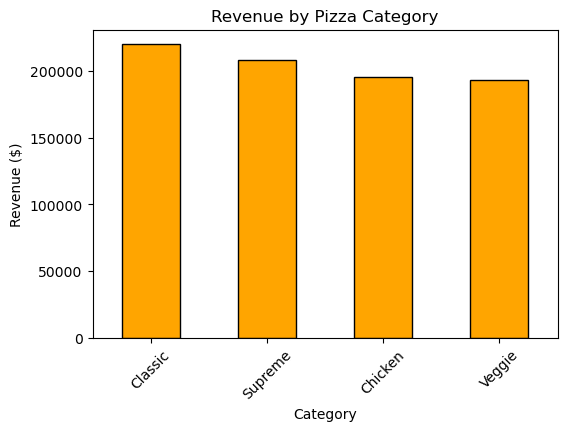

In [42]:
# Visualization

plt.figure(figsize=(6,4))

pizza_category.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Revenue by Pizza Category")

plt.xlabel("Category")

plt.ylabel("Revenue ($)")

plt.xticks(rotation=45)

plt.show()

## Insights and Conlusion

**Total Revenue** :  $ 817860.05

**Total Quantity Sold** : 49,574 pizzas

**Total Orders** : 21,350 orders

**Number of Pizza Types** : 32 pizza types.

**Average Price of Pizzas** : $16.49.

**Peak hours** : 22hours(afternoon) generated the highest revenue

**Best sales day** : Friday with $136073.90 as revenue, and with the total analysis of day, there is an indication of high demand during the weekend.

**Best sales month** : July with $72557.90 as revenue

**Highest selling Pizza Type** : The Big Meat Pizza (S) with the total of 1,914 sold

**Lowest selling Pizza Type** : The Brie Carre Pizza ; both in quantity sold (490) and in revenue( $11588.50)

**Pizza Size That Sold The Most** : Large (L) pizzas generate the highest revenue, followed by Medium (M) and Small (S). This shows that customers prefers                                  large sized pizzas than any other size

**Pizza Category That Sold The Most** : Classic pizzas generate the highest revenue, followed by Supreme and Chicken categories. This shows that customers                                      prefers traditional pizzas more
